<a href="https://colab.research.google.com/github/liuxx479/kappaTNG/blob/master/kappaTNG_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from pylab import *
import os
from scipy.interpolate import interp1d
from astropy.io import fits
from scipy.special import factorial
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
root = '/content/drive/My Drive/kappaTNG/'
zs = np.genfromtxt(root+'Clkk_ratio/zs.dat')

In [4]:
# print (zs)
zs_target = zs#[0.506387, 1.034093, 1.532007, 2.093596]
zs_string = ''
for izs in zs_target: zs_string+=str(izs)+','
zs_string=zs_string[:-1]
# print (zs_string)

In [5]:
######## parameters

# LCDM parameters
A_s = 2.142e-9
h=0.6774
OmegaB = 0.0486
OmegaM = 0.3089
n_s = 0.9667


### derived parameters
#z_reio = 10.0 #11.357
ombh2 = OmegaB*h**2
omch2 = (OmegaM-OmegaB)*h**2
H0=h*100
### accuracy parameters
lmax=10000

In [6]:
######## install class if need
# !git clone https://github.com/lesgourg/class_public.git class
# os.chdir('class')
# !make
# https://github.com/lesgourg/class_public/blob/master/explanatory.ini

In [7]:
from classy import Class

In [8]:
LambdaCDM = Class()
LambdaCDM.set({'omega_b':ombh2,'omega_cdm':omch2,'h':h,'A_s':A_s,'n_s':n_s})
LambdaCDM.set({'output':'mPk,sCl',
                'P_k_max_1/Mpc':10.0,
                #'z_pk':0,
                #'reio_parametrization':'reio_none',
                'l_switch_limber':100,
                'selection':'dirac',
                'selection_mean': zs_string, #selection_mean = 0.98,0.99,1.0,1.1,1.2
                'l_max_lss':lmax,
               'non linear':'halofit'
                # 'non linear':'HMcode'
              })


True

In [9]:
# LambdaCDM.compute()

# si8=LambdaCDM.sigma8()

# cls=LambdaCDM.density_cl(lmax)

# ell=cls['ell'][2:]
# clphiphi=cls['ll'][0][2:]
# clkk=1.0/4 * (ell+2.0)*(ell+1.0)*(ell)*(ell-1.0)*clphiphi


In [10]:
# cls.keys()
# # cls['ll']
# save(root+'takahashi_ell.npy', cls['ell'])
# save(root+'takahashi_cls.npy', cls['ll'])

In [11]:
############# fitting formula from Ken
zs2,  ls1,  ls2,  a1,  a2 = np.genfromtxt(root+'fitted_params_osato.txt', usecols=range(1,6)).T
ratio_osato_fun = lambda i: (1+(ell/ls1[i])**a1[i]) / (1+(ell/ls2[i])**a2[i])

[ 101.8234  144.      160.9969  218.7537  284.3995  359.3011  446.1363
  562.7012  713.0505  892.3582 1056.544  1192.623  1335.852  1497.288
 1681.971  1888.175  2119.545  2377.31   2668.762  2993.712  3359.343 ]


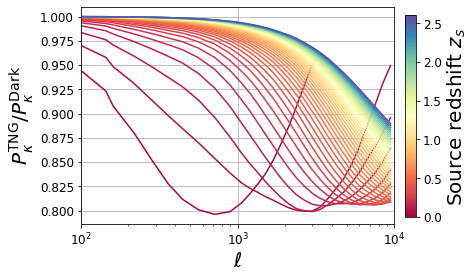

In [31]:
######### plot_ratio_all.py
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# from IPython.display import Math, HTML

# plt.rc("text", usetex=True)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)


zs = np.loadtxt(root+"zs.dat")

fig = plt.figure()
cmap = mpl.cm.get_cmap('Spectral')
norm = mpl.colors.Normalize(vmin=0.0, vmax=2.6)


for i in range(1, 41):
    d = np.loadtxt(root+"data/output/spec/ratio{:02d}.dat".format(i))
    if i == 1:
        ell = d[:21, 0]
        ratio = d[:21, 1]
        print(ell)
    else:
        ell = d[:, 0]
        ratio = d[:, 1]
    plt.plot(ell, ratio, c=cmap(norm(zs[i-1])))

plt.xscale('log')
plt.xlim(1e2, 1e4)
plt.xlabel(r'$\ell$', fontsize=20)
# plt.ylabel(r'$R (\ell)$', fontsize=15)
plt.ylabel(r'$P_\kappa^{\rm TNG}/P_\kappa^{\rm Dark}$', fontsize=20)

plt.grid()

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.875, 0.15, 0.025, 0.7])

cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar.set_label(r"Source redshift $z_s$", fontsize=20)

# plt.tight_layout()
plt.savefig(root+"figures/ratio_all.pdf", bbox_inches='tight')
# plt.show()
